In [1]:
from vqvae.envs import GoalBaseEnv, Reacher
from rlkit.samplers.rollout_functions import multitask_rollout_visualizer
import numpy as np

def collect_rollout(env,agent=None,
                    render_kwargs=dict(width=32,height=32,camera_id=0)):
    return multitask_rollout_visualizer(env,
                agent=agent,
                max_path_length=env.max_steps,
                render=True,
                render_kwargs=render_kwargs,
                observation_key='',
                desired_goal_key='desired_goal',
                get_action_kwargs=None,
                return_dict_obs=True)

In [42]:
max_path_length = 100
env = Reacher(max_steps=max_path_length,max_reward_hits=50,fixed_length=True)

def collect_successful_rollout(env,
                               render_kwargs=dict(width=32,height=32,camera_id=0)):
    while True:

        path = multitask_rollout_visualizer(env,
                agent=None,
                max_path_length=env.max_steps,
                render=True,
                render_kwargs=render_kwargs,
                observation_key='',
                desired_goal_key='desired_goal',
                get_action_kwargs=None,
                return_dict_obs=True)
        if np.sum(path['rewards']) != -max_path_length:
            return path
        
        return
def collect_rollout(env,agent=None,
                    render_kwargs=dict(width=32,height=32,camera_id=0)):
    return multitask_rollout_visualizer(env,
                agent=agent,
                max_path_length=env.max_steps,
                render=True,
                render_kwargs=render_kwargs,
                observation_key='',
                desired_goal_key='desired_goal',
                get_action_kwargs=None,
                return_dict_obs=True)

#path = collect_successful_rollout(env)

def collect_dataset(env_name='reacher',path_length=100,n_paths=10,save=False):
    if env_name == 'reacher':
        env = Reacher(max_steps=path_length,fixed_length=True)
    else:
        raise NotImplementedError
        
        
    paths = {}
        
    for i in range(n_paths):
        if i%2:
            path = collect_rollout(env)
        else:
            path = collect_successful_rollout(env)
        
        for k,v in path.items():
            if k not in paths:
                paths[k]=v
            else:
                paths[k]+=v
        
            
    paths["meta"] = dict(
        env=env_name,
        path_length=path_length,
        n_paths=n_paths
    )
    
    if save:
        s = '_'.join([str(k) + '_'+str(v) for k,v in paths["meta"].items()])
        np.save(s,paths)
    
    return paths

#paths = collect_dataset(save=True)

In [25]:
data = np.load("env_reacher_path_length_100_n_paths_10.npy",allow_pickle=True)

In [36]:
x = data.item().get("images")
print(np.array(x).shape)

(1000, 32, 32, 3)


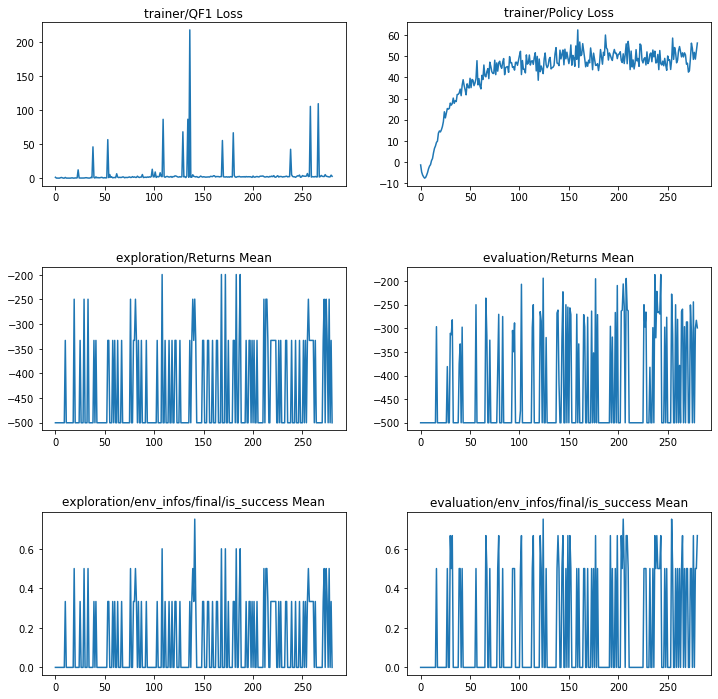

In [133]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
%matplotlib inline

dir_ = '/home/misha/research/rlkit/data'
file = '/pontmass-HER-SAC-test/pontmass_HER-SAC_test_2019_07_12_15_56_01_0000--s-0/progress.csv'

file = '/reacher-HER-SAC-0/reacher_HER-SAC_0_2019_07_12_17_55_33_0000--s-0/progress.csv'

file = '/reacher-SAC-0/reacher_SAC_0_2019_07_12_19_57_03_0000--s-0/progress.csv'

#file = '/reacher-SAC-0/reacher_SAC_0_2019_07_12_20_26_49_0000--s-0/progress.csv'

#file = '/manipulator-SAC-0/manipulator_SAC_0_2019_07_12_21_49_58_0000--s-0/progress.csv'

file = '/pointmass-SAC-0/pointmass_SAC_0_2019_07_14_11_35_56_0000--s-0/progress.csv'

file = '/reacher-HER-SAC-0/reacher_HER-SAC_0_2019_07_14_13_46_19_0000--s-0/progress.csv'

file = '/vqvae-pointmass-SAC-exp-r/vqvae_pointmass_SAC_exp_r_2019_07_14_18_14_39_0000--s-0/progress.csv'

file = '/vqvae-pointmass-SAC-log-r/vqvae_pointmass_SAC_log_r_2019_07_14_18_29_05_0000--s-0/progress.csv'

file = '/vqvae-pointmass-SAC-jul15-log-r/vqvae_pointmass_SAC_jul15_log_r_2019_07_15_11_55_18_0000--s-0/progress.csv'

file = '/vqvae-pointmass-SAC-jul15-binary/vqvae_pointmass_SAC_jul15_binary_2019_07_15_12_17_14_0000--s-0/progress.csv'

file = '/vqvae-pointmass-SAC-jul15-cheat/vqvae_pointmass_SAC_jul15_cheat_2019_07_15_12_23_17_0000--s-0/progress.csv'

file1 ='/vqvae-pointmass-SAC-cheat-index/vqvae_pointmass_SAC_cheat_index_2019_07_15_13_57_24_0000--s-0/progress.csv'

file2 = '/vqvae-pointmass-SAC-cheat-cont/vqvae_pointmass_SAC_cheat_cont_2019_07_15_14_33_01_0000--s-0/progress.csv'

file3 = '/vqvae-pointmass-SAC-cheat-mixed/vqvae_pointmass_SAC_cheat_mixed_2019_07_15_18_37_32_0000--s-0/progress.csv'


file =  '/pointmass-HER-SAC-0/pointmass_HER-SAC_0_2019_07_16_13_12_53_0000--s-0/progress.csv'
file = '/pm-HER-SAC-VQVAE-jul16/pm_HER-SAC-VQVAE_jul16_2019_07_16_15_19_23_0000--s-0/progress.csv'
df1 = pd.read_csv(dir_+file1)[:]
df2 = pd.read_csv(dir_+file2)[:]
df3 = pd.read_csv(dir_+file3)[:]
df = pd.read_csv(dir_+file)[:]
sac_keys = ['trainer/QF1 Loss',
            'trainer/Policy Loss',
            'exploration/Returns Mean',
            'evaluation/Returns Mean',
            'exploration/env_infos/final/is_success Mean',
            'evaluation/env_infos/final/is_success Mean',
            #'exploration/env_infos/is_success Mean',
            #'evaluation/env_infos/is_success Mean'
           ]

from scipy.signal import savgol_filter

def plot_results(dfs,smooth,*keys):
    n = len(keys)
    rows = n//2 if n%2==0 else n//2+1
    cols = 2
    
    plot_dim = str(rows)+str(cols)
    subplot_keys = [int(plot_dim+str(x)) for x in range(1,n+1)]
    
    fig = plt.figure(figsize=(12,12))
    fig.subplots_adjust(hspace=.5)

    
    for k1,k2 in zip(keys,subplot_keys):
        fig.add_subplot(k2)  
        ax = plt.subplot(str(k2))
        ax.set_title(k1)
        w = 13
        if smooth:
            if 'is_success' in k1:
                for df in dfs:
                    plt.plot(np.clip(savgol_filter(df[k1],w,2),0,1))
                
            elif 'Returns' in k1:
                for df in dfs:
                    plt.plot(np.clip(savgol_filter(df[k1],w,2),-500,0))
            else:
                for df in dfs:
                    plt.plot(savgol_filter(df[k1],w,2))
        else:
            if 'is_success' in k1:
                for df in dfs:
                    plt.plot(np.clip(df[k1],0,1))
            else:
                for df in dfs:
                    plt.plot(df[k1])
        
    plt.show()


    
plot_results([df],False,*sac_keys)

In [124]:
import numpy as np
# 1e-2 = exp(-x**2/0.002)
# x = np.sqrt(-log(1e-2)*0.002)
np.sqrt(-np.log(1.4e-2)*0.002)

0.0923980297340466

500 [-500.]


array([[-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.]])

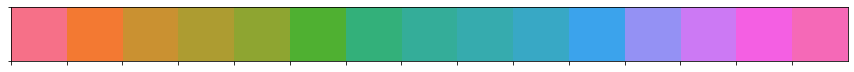

In [126]:
from rlkit.torch.sac.policies import MakeDeterministic, TanhGaussianPolicy
from rlkit.envs.wrappers import NormalizedBoxEnv
import rlkit.torch.pytorch_util as ptu
from rlkit.envs.dm import DMGoalPointMassEnv
from rlkit.samplers.rollout_functions import multitask_rollout_visualizer,rollout_visualizer
from vqvae.envs.reacher import EasyReacher
from vqvae.envs.manipulator import EasyManipulator
from vqvae.envs.pointmass import EasyPointmass, EasyPointmassVQVAE,GoalPointmass,GoalPointmassVQVAE

file = '/vqvae-pointmass-SAC-cheat-mixed/vqvae_pointmass_SAC_cheat_mixed_2019_07_15_18_37_32_0000--s-0/progress.csv'

import pickle 

dir_ = '/home/misha/research/rlkit/data'
file = '/pontmass-HER-SAC-test/pontmass_HER-SAC_test_2019_07_12_15_56_01_0000--s-0/params.pkl'

file = '/reacher-HER-SAC-0/reacher_HER-SAC_0_2019_07_12_17_55_33_0000--s-0/params.pkl'
file = '/reacher-SAC-0/reacher_SAC_0_2019_07_12_20_26_49_0000--s-0/params.pkl'
#file='/manipulator-SAC-0/manipulator_SAC_0_2019_07_12_21_49_58_0000--s-0/params.pkl'
file = '/pointmass-SAC-0/pointmass_SAC_0_2019_07_14_11_35_56_0000--s-0/params.pkl'
file = '/vqvae-pointmass-SAC-exp-r/vqvae_pointmass_SAC_exp_r_2019_07_14_18_14_39_0000--s-0/params.pkl'
file = '/vqvae-pointmass-SAC-log-r/vqvae_pointmass_SAC_log_r_2019_07_14_18_29_05_0000--s-0/params.pkl'
file = '/vqvae-pointmass-SAC-jul15-cheat/vqvae_pointmass_SAC_jul15_cheat_2019_07_15_12_23_17_0000--s-0/params.pkl'
file ='/vqvae-pointmass-SAC-cheat-index/vqvae_pointmass_SAC_cheat_index_2019_07_15_13_57_24_0000--s-0/params.pkl'

file = '/vqvae-pointmass-SAC-cheat-cont/vqvae_pointmass_SAC_cheat_cont_2019_07_15_14_33_01_0000--s-0/params.pkl'
file = '/vqvae-pointmass-SAC-cheat-mixed/vqvae_pointmass_SAC_cheat_mixed_2019_07_15_18_37_32_0000--s-0/params.pkl'

file =  '/pointmass-HER-SAC-0/pointmass_HER-SAC_0_2019_07_16_13_12_53_0000--s-0/params.pkl'
file = '/pm-HER-SAC-VQVAE-jul16/pm_HER-SAC-VQVAE_jul16_2019_07_16_15_19_23_0000--s-0/params.pkl'


MODEL_PATH = '/home/misha/research/vqvae/results/vqvae_temporal_data_long_ne8nd2.pth'


def run_policy(file,goal_env=False):

    ptu.set_gpu_mode(True,0)

    
        
    with open(file,'rb') as f:
        params = pickle.load(f)


    #eval_env = EasyPointmassVQVAE(obs_dim=192,rep_type='mixed',max_steps=500)
    #eval_env = GoalPointmass(reward_type='sparse',max_steps=500)
    eval_env =GoalPointmassVQVAE(threshold=0.2, obs_dim=128, goal_dim=128, model_path=MODEL_PATH, 
                                 reward_type='sparse',
                                  max_steps=500)
    if goal_env:
        obs_dim = eval_env.observation_space.spaces['observation'].low.size
        action_dim = eval_env.action_space.low.size
        goal_dim = eval_env.observation_space.spaces['desired_goal'].low.size
    else:
        obs_dim = eval_env.observation_space.low.size
        action_dim = eval_env.action_space.low.size

    policy = params['exploration/policy'] #.to(ptu.device)
    policy = policy.eval()
    policy = MakeDeterministic(policy)
    if goal_env:
        path = multitask_rollout_visualizer(eval_env,
                agent=policy,
                max_path_length=eval_env.max_steps,
                render=True,
                render_kwargs=dict(
                    height=480,width=480,
                    camera_id=0
                ),
                observation_key='observation',
                desired_goal_key='desired_goal',
                get_action_kwargs=None,
                return_dict_obs=True)
    else:
        path = rollout_visualizer(eval_env,
                agent=policy,
                max_path_length=eval_env.max_steps,
                render=True,
                render_kwargs=dict(
                    height=480,width=480,
                    camera_id=0
                )
                                 )
                                 
    
    return path,eval_env

path,env = run_policy(dir_+file,True)

r = path['rewards']
print(len(r),sum(r))
r[-5:]

In [127]:
len(env.visited_reps)

76

In [128]:
import skvideo.io
import numpy as np

def list_to_vid(name,imgs):
    imgs = np.array(imgs)
    outputdata = imgs
    outputdata = outputdata.astype(np.uint8)
    skvideo.io.vwrite(name+".mp4", outputdata)

list_to_vid('video',path["images"])

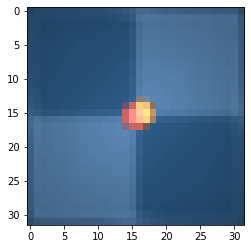

In [120]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dm_control import suite


x =env.goal_img.reshape(32,32,3)
y = env.render(width=32,height=32,camera_id=0)
plt.imshow(x)



In [121]:
import torch
img = env.goal_img
img = env.numpy_to_tensor_img(img)
img = env.normalize_image(img)
print(img.shape)
x = env.encode_image(img)

img_ = env.get_current_image()
img = env.numpy_to_tensor_img(img_)
img = env.normalize_image(img)
y = env.encode_image(img)
np.linalg.norm(x-y)

torch.Size([1, 3, 32, 32])


0.32675713

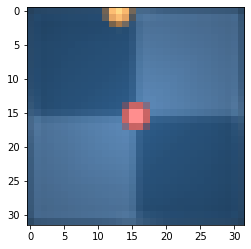

In [122]:
plt.imshow(img_.reshape(32,32,3))

In [78]:
from vqvae.envs.pointmass import Pointmass, EasyPointmassVQVAE
from vqvae.envs.reacher import Reacher
import numpy as np
model_path = '/home/misha/research/vqvae/results/vqvae_temporal_data_long_ne8nd2.pth'
env = EasyPointmassVQVAE(model_path=model_path)
d = False
o = env.reset()
o_start = o.copy()

while not d:
    a = env.action_space.sample()
    o_,r,d,info = env.step(a)
    #print('distance between o_t and o_t+1',np.linalg.norm(o-o_))
    print('distance between o_{t+1} and o_0',np.linalg.norm(o_start-o_))
    #print(r)
    o = o_

print(o.shape)
print(env.encoded_goal.shape)
physics = env.physics()
physics.named.data.geom_xpos

distance between o_{t+1} and o_0 0.00038905913
distance between o_{t+1} and o_0 0.00068512897
distance between o_{t+1} and o_0 0.00074113405
distance between o_{t+1} and o_0 0.00060557685
distance between o_{t+1} and o_0 0.0016898365
distance between o_{t+1} and o_0 0.004233689
distance between o_{t+1} and o_0 0.0042217644
distance between o_{t+1} and o_0 0.004093654
distance between o_{t+1} and o_0 0.0051575643
distance between o_{t+1} and o_0 0.005199838
distance between o_{t+1} and o_0 0.0058327983
distance between o_{t+1} and o_0 0.005951023
distance between o_{t+1} and o_0 0.0056519927
distance between o_{t+1} and o_0 0.0067861117
distance between o_{t+1} and o_0 0.008187118
distance between o_{t+1} and o_0 0.008821357
distance between o_{t+1} and o_0 0.009979471
distance between o_{t+1} and o_0 0.010357262
distance between o_{t+1} and o_0 0.010348683
distance between o_{t+1} and o_0 0.010572943
distance between o_{t+1} and o_0 0.012290834
distance between o_{t+1} and o_0 0.012711

distance between o_{t+1} and o_0 0.05480348
distance between o_{t+1} and o_0 0.055280123
distance between o_{t+1} and o_0 0.055481512
distance between o_{t+1} and o_0 0.05564197
distance between o_{t+1} and o_0 0.0561251
distance between o_{t+1} and o_0 0.05712696
distance between o_{t+1} and o_0 0.056980602
distance between o_{t+1} and o_0 0.0572547
distance between o_{t+1} and o_0 0.057564467
distance between o_{t+1} and o_0 0.056484524
distance between o_{t+1} and o_0 0.057599373
distance between o_{t+1} and o_0 0.058629144
distance between o_{t+1} and o_0 0.05920109
distance between o_{t+1} and o_0 0.058718935
distance between o_{t+1} and o_0 0.059347596
distance between o_{t+1} and o_0 0.06035644
distance between o_{t+1} and o_0 0.06079227
distance between o_{t+1} and o_0 0.061441045
distance between o_{t+1} and o_0 0.06244147
distance between o_{t+1} and o_0 0.06265689
distance between o_{t+1} and o_0 0.06259696
distance between o_{t+1} and o_0 0.06462033
distance between o_{t+1}

distance between o_{t+1} and o_0 0.151052
distance between o_{t+1} and o_0 0.15109973
distance between o_{t+1} and o_0 0.15104374
distance between o_{t+1} and o_0 0.14979622
distance between o_{t+1} and o_0 0.14988515
distance between o_{t+1} and o_0 0.14957237
distance between o_{t+1} and o_0 0.15062612
distance between o_{t+1} and o_0 0.15025695
distance between o_{t+1} and o_0 0.1495212
distance between o_{t+1} and o_0 0.1495485
distance between o_{t+1} and o_0 0.14981554
distance between o_{t+1} and o_0 0.14947848
distance between o_{t+1} and o_0 0.14971502
distance between o_{t+1} and o_0 0.14890805
distance between o_{t+1} and o_0 0.14834777
distance between o_{t+1} and o_0 0.14836013
distance between o_{t+1} and o_0 0.14571063
distance between o_{t+1} and o_0 0.14498043
distance between o_{t+1} and o_0 0.14510128
distance between o_{t+1} and o_0 0.14427024
distance between o_{t+1} and o_0 0.14748557
distance between o_{t+1} and o_0 0.14721777
distance between o_{t+1} and o_0 0.1

distance between o_{t+1} and o_0 0.19238794
distance between o_{t+1} and o_0 0.19351983
distance between o_{t+1} and o_0 0.19180489
distance between o_{t+1} and o_0 0.19149175
distance between o_{t+1} and o_0 0.19071335
distance between o_{t+1} and o_0 0.18967544
distance between o_{t+1} and o_0 0.18886271
distance between o_{t+1} and o_0 0.18851559
distance between o_{t+1} and o_0 0.18942136
distance between o_{t+1} and o_0 0.19096786
distance between o_{t+1} and o_0 0.19145499
distance between o_{t+1} and o_0 0.19212195
distance between o_{t+1} and o_0 0.19220208
distance between o_{t+1} and o_0 0.19219355
distance between o_{t+1} and o_0 0.1906867
distance between o_{t+1} and o_0 0.19026974
distance between o_{t+1} and o_0 0.1899751
distance between o_{t+1} and o_0 0.19109042
distance between o_{t+1} and o_0 0.1907675
distance between o_{t+1} and o_0 0.1905314
distance between o_{t+1} and o_0 0.19023229
distance between o_{t+1} and o_0 0.1903592
distance between o_{t+1} and o_0 0.19

distance between o_{t+1} and o_0 0.22124831
distance between o_{t+1} and o_0 0.21996763
distance between o_{t+1} and o_0 0.21936116
distance between o_{t+1} and o_0 0.21902165
distance between o_{t+1} and o_0 0.21922214
distance between o_{t+1} and o_0 0.22011591
distance between o_{t+1} and o_0 0.22170034
distance between o_{t+1} and o_0 0.22292772
distance between o_{t+1} and o_0 0.22163114
distance between o_{t+1} and o_0 0.22220139
distance between o_{t+1} and o_0 0.22171547
distance between o_{t+1} and o_0 0.22144727
distance between o_{t+1} and o_0 0.22140194
distance between o_{t+1} and o_0 0.22247861
distance between o_{t+1} and o_0 0.2216124
distance between o_{t+1} and o_0 0.22189426
distance between o_{t+1} and o_0 0.2202864
distance between o_{t+1} and o_0 0.2197244
distance between o_{t+1} and o_0 0.21948557
distance between o_{t+1} and o_0 0.21898033
distance between o_{t+1} and o_0 0.21933581
distance between o_{t+1} and o_0 0.21989241
distance between o_{t+1} and o_0 0.

FieldIndexer(geom_xpos):
               x         y         z         
0     ground [ 0         0         0       ]
1     wall_x [-0.3       0         0.02    ]
2     wall_y [ 0        -0.3       0.02    ]
3 wall_neg_x [ 0.3       0         0.02    ]
4 wall_neg_y [ 0         0.3       0.02    ]
5     target [ 0         0         0.01    ]
6  pointmass [-0.226     0.208     0.01    ]

In [2]:
plt.imshow(env.physics().render(camera_id=0))

{'observation': array([-0.05153541,  0.02423619,  0.        ,  0.        ]),
 'desired_goal': array([-0.05153541,  0.02423619,  0.01      ]),
 'achieved_goal': array([0.  , 0.  , 0.01]),
 'state_observation': array([-0.05153541,  0.02423619,  0.        ,  0.        ]),
 'state_desired_goal': array([-0.05153541,  0.02423619,  0.01      ]),
 'state_achieved_goal': array([0.  , 0.  , 0.01])}

In [1]:

def _ts_to_obs(ts):
    flat_obs = np.array(list(ts.observation.values())).reshape(-1)
    return np.array([v for v in flat_obs])

flat_obs = np.array(list(obs.observation.values())).reshape(-1)
flat_obs = np.concatenate([v.reshape(-1) for v in list(obs.observation.values())]).reshape(-1)


NameError: name 'np' is not defined

In [131]:
flat_obs

array([-1.01068584,  2.16042654, -0.17267569, -0.10404113,  0.        ,
        0.        ])

In [10]:
from vqvae.envs.pointmass import EasyPointmassVQVAE
import numpy as np 

env = EasyPointmassVQVAE(obs_dim=64,max_steps=500)


obs = env.reset()

i = 0
d = False
reps = set()
while not d:
    obs_,r,d,_ = env.step(env.action_space.sample())
    diff = np.linalg.norm(obs_-obs)
    print(i,diff)
    reps.add(hash(diff))
    i+=1

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 1.1428572
11 1.1428572
12 1.1428572
13 1.1428572
14 1.1428572
15 1.1428572
16 1.1428572
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.0
51 0.0
52 0.0
53 0.0
54 0.0
55 0.0
56 0.0
57 0.0
58 0.0
59 1.1428572
60 1.1428572
61 1.1428572
62 1.1428572
63 1.1428572
64 1.1428572
65 1.1428572
66 1.1428572
67 1.1428572
68 1.1428572
69 1.1428572
70 1.1428572
71 1.1428572
72 1.1428572
73 1.1428572
74 1.1428572
75 1.1428572
76 1.1428572
77 0.0
78 0.0
79 0.0
80 0.0
81 0.0
82 0.0
83 0.0
84 0.0
85 0.0
86 0.0
87 0.0
88 0.0
89 0.0
90 0.0
91 0.0
92 0.0
93 0.0
94 0.0
95 0.0
96 0.0
97 0.0
98 0.0
99 0.0
100 0.0
101 0.0
102 0.57142866
103 0.57142866
104 0.57142866
105 0.57142866
106 0.57142866
107 0.57142866
108 0.57142866
109 0.57142866
110 0.57142866
111 0.571

In [11]:
len(reps)

13

In [14]:
obs_-obs

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., -2.], device='cuda:0')

In [13]:
env.encoded_goal.reshape(-1)

array([ 0.0150643 ,  0.01472726,  0.01449611,  0.01468275, -0.01748722,
       -0.01765984, -0.0175801 ,  0.01535117,  0.01476891,  0.01450147,
        0.01488799,  0.01529051, -0.0568337 , -0.05707382, -0.05744028,
       -0.0175785 ,  0.01472545,  0.01487562,  0.01476144,  0.03701973,
       -0.04661251, -0.02445185, -0.05684068, -0.01768162,  0.0145491 ,
       -0.01845104,  0.01562021, -0.10512695, -0.16002099, -0.05571976,
       -0.05552775, -0.01783995, -0.01779744, -0.05810116, -0.02915176,
       -0.13982245,  0.02096233,  0.01623747,  0.01526924,  0.0145765 ,
       -0.0180578 , -0.05682004, -0.0591734 , -0.05962575,  0.01678911,
        0.01478518,  0.01483553,  0.01467606, -0.01792921, -0.05727209,
       -0.05785504, -0.05742313, -0.01743859,  0.01466979,  0.01467526,
        0.01465764,  0.01530025, -0.0178281 , -0.01792024, -0.01774928,
        0.01494049,  0.01470162,  0.0148294 ,  0.01493991, -0.07320304,
       -0.07326582, -0.07320931, -0.07307108, -0.04447836, -0.04

In [42]:
import numpy as np
np.linalg.norm(env.encoded_goal.detach().cpu().numpy()-obs.detach().cpu().numpy())

0.383325

In [5]:
encoding = env.encoded_goal.reshape(-1).detach().cpu().numpy().copy()
img = env.goal_img

In [50]:
np.linalg.norm(env.encoded_goal.reshape(-1).detach().cpu().numpy()-encoding)

0.06994022

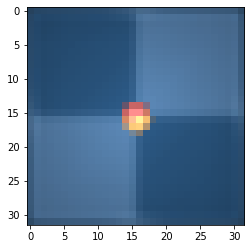

In [51]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dm_control import suite


x = (env.goal_img)
y = env.render(width=32,height=32,camera_id=0)
plt.imshow(env.goal_img.reshape(32,32,3))

#plt.imshow(img.reshape(32,32,3))


In [47]:
_=env.reset()

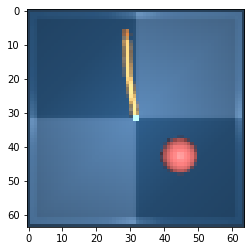

In [24]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dm_control import suite
env = suite.load('reacher','easy')

obs = env.reset()
spec = env.action_spec()
for _ in range(200):
    action = np.random.uniform (spec.minimum ,spec.maximum , spec.shape )
    obs,_,_,_ = env.step(action)
    
img = env.physics.render(64,64,camera_id=0)

plt.imshow(img)


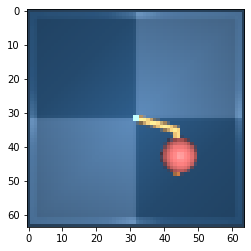

In [25]:
import numpy as np
def l2(x,y):
    return np.linalg.norm(x-y)

def obj_and_target_pos(env):
    xpos = env.physics.named.data.geom_xpos
    return xpos['finger'],xpos['target']

x,y =obj_and_target_pos(env)
while l2(x,y) > 0.05:
    
    with env.physics.reset_context():
        env.physics.named.data.qpos['shoulder'][0] = np.random.randint(7)
        env.physics.named.data.qpos['wrist'][0] = np.random.randint(7)
    x,y =obj_and_target_pos(env)

img = env.physics.render(64,64,camera_id=0)

plt.imshow(img)

In [ ]:
with env.physics.reset_context():
    env.physics.named.data.qpos['shoulder'][0] = 6.3
    env.physics.named.data.qpos['wrist'][0] = 6.3

img = env.physics.render(64,64,camera_id=0)

plt.imshow(img)

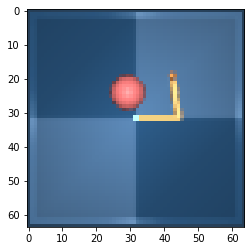

In [7]:
env.visited_reps


{-8514720801643252590,
 -8263941736775262625,
 -6405545788022410094,
 -6373855910198244813,
 -6319947483253750844,
 -4847513318944389831,
 -4334503212042373998,
 -4004053534625735073,
 -3310706675167786445,
 4467155812722732952,
 7803975120258358879,
 8867116052561791539}

In [1]:
from vqvae.envs.pointmass import GoalPointmass,GoalPointmassVQVAE
import numpy as np
model_path = '/home/misha/research/vqvae/results/vqvae_temporal_data_long_ne8nd2.pth'

env = GoalPointmassVQVAE(threshold=0.2,obs_dim=128,goal_dim=128,model_path=model_path)

def l2(x,y):
    return np.linalg.norm(x-y)

while True:
    obs = env.reset()
    x = obs['desired_goal']
    y = obs['achieved_goal']
    dist = l2(x,y)
    
    if dist < env.threshold+0.03:
        break
    else:
        print('reset',dist,end='\r')
        
    

i=0
while True:
    i+=1
    action = env.action_space.sample()
    obs_next,r,d,info = env.step(action)
    x = obs_next['desired_goal']
    y = obs_next['achieved_goal']
    dist = l2(x,y)
    print('step',i,dist,'r',r)
    if d:

        print('steps',env.steps,'i',i)
        break

step 1 0.20362131 r -1.0
step 2 0.20381883 r -1.0
step 3 0.20425099 r -1.0
step 4 0.20739594 r -1.0
step 5 0.20832509 r -1.0
step 6 0.20920146 r -1.0
step 7 0.21012557 r -1.0
step 8 0.21090035 r -1.0
step 9 0.21445352 r -1.0
step 10 0.21522878 r -1.0
step 11 0.21607797 r -1.0
step 12 0.22066997 r -1.0
step 13 0.22350556 r -1.0
step 14 0.22451697 r -1.0
step 15 0.22589107 r -1.0
step 16 0.22719577 r -1.0
step 17 0.2283782 r -1.0
step 18 0.22939433 r -1.0
step 19 0.2303204 r -1.0
step 20 0.23164508 r -1.0
step 21 0.23077196 r -1.0
step 22 0.23146272 r -1.0
step 23 0.23278186 r -1.0
step 24 0.23339206 r -1.0
step 25 0.23273028 r -1.0
step 26 0.23280974 r -1.0
step 27 0.23405574 r -1.0
step 28 0.23429048 r -1.0
step 29 0.23424341 r -1.0
step 30 0.23373239 r -1.0
step 31 0.2340323 r -1.0
step 32 0.23219159 r -1.0
step 33 0.230548 r -1.0
step 34 0.2299131 r -1.0
step 35 0.2286043 r -1.0
step 36 0.22794507 r -1.0
step 37 0.22780432 r -1.0
step 38 0.22731337 r -1.0
step 39 0.2239069 r -1.0
ste

In [2]:
from vqvae.envs.pointmass import GoalPointmassVQVAE

model_path = '/home/misha/research/vqvae/results/vqvae_temporal_data_long_ne8nd2.pth'
env = GoalPointmassVQVAE(obs_dim=128,goal_dim=128,model_path=model_path)
obs = env.reset()



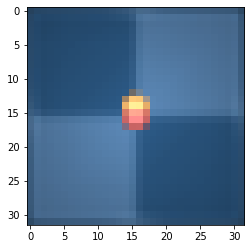

In [2]:
import numpy as np
from vqvae.envs.pointmass import GoalPointmassVQVAE
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
"""
def l2(x,y):
    return np.linalg.norm(x-y)


model_path = '/home/misha/research/vqvae/results/vqvae_temporal_data_long_ne8nd2.pth'
env = GoalPointmassVQVAE(obs_dim=128,goal_dim=128,threshold=.2,model_path=model_path)
obs = env.reset()
x = obs['desired_goal']
y = obs['achieved_goal']
dist = l2(x,y)

while dist > env.threshold:
    obs = env.reset()

    x = obs['desired_goal']
    y = obs['achieved_goal']
    dist = l2(x,y)
    """
img = env.dm_env.physics.render(32,32,0)
plt.imshow(env.goal_img.reshape(32,32,3))

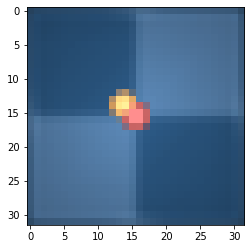

In [3]:
plt.imshow(img)